# Physical Adsorption Analysis

## Task Summary

1. Create a Python code block that will calculate an expected dosing pressure for a next dose, given the current equilibrium pressure, current adsorbed amount, and expected additional adsorbed amount.  Use this code to estimate the dosing pressure for the first 4 data points and check with the instructor or TA to make sure you are ready to start taking data.
2. With your software code, set up the ability to make a plot similar to Figure 5 that will allow you to watch the progress of the isotherm as it is created.
3. Collect and plot data for the argon isotherm, per the instructions.  Include a table of your pressure measurements before and after each dose along with the calculated adsorbed amount.
4. Repeat the procedure to collect and plot data for nitrogen isotherm.  Be careful: the substep will appear between 7 and 9 torr; decrease dose sizes significantly so that you do not miss this feature.
5. Determine the monolayer completion volume-STP of the nitrogen floating phase and the argon by using the “point B” method.  You may fit a line to a subset of points in your data, and show this line on the full data set.  Also show the location of “point B” for each set.


In [5]:
# Import Packages

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import uncertainties as unc
%matplotlib inline

In [6]:
# Plot Settings
mpl.rcParams['figure.figsize'] = 12.0,8.0  # Roughly 12 cm wde by 8 cm high
mpl.rcParams['font.size'] = 14.0 # Use 14 point font

## Calculate expected dosing

Rearrange the formulas giving the coverage amount for each step summarized by the [Number versus Pressure](http://courses.washington.edu/phys431/adsorption/Volume-vs-Pressure_deriv.pdf) calculation to make a formula that predicts the dosing pressure given the sample and calibration volumes $v_s$ and $v_c$, the room temperature $T$ (K), the standard temperature and pressure $T_0 = 273$ K and $P_0 = 760$ torr, and the amount adsorbed in a given step in $V_{STP}$ (in cc).

Then make a Python function that calculates this given the input quantities.

In [7]:
# Create your function here
def expected_dose(Pf_want, Pf_last, Vstp_add, T = 295.5, vs = 34.8,
                  vc = 85.1, T0 = 273, P0 = 760):
    return (P0*T/T0/vc) * Vstp_add + Pf_want + (vs/vc) * (Pf_want - Pf_last)

print(expected_dose(0.3, 0, 2.5, 295), "Torr")
print(expected_dose(0.5, 0.3, 1.2, 295), "Torr")

def dose_chopper(eq_Ps,Vstps, T = 295.5):
    doses = []
    for i in range(1, len(eq_Ps)):
        dose = expected_dose(eq_Ps[i], eq_Ps[i - 1], Vstps[i] - Vstps[i - 1], T)
        print(f"Expected calibration chamber pressure for dose {i}: {dose:.2f} Torr")
        doses.append(dose)
    return doses


24.548572892051155 Torr
12.162215105693368 Torr


In [22]:
# Create arrays to hold the extracted results
eq_Ps = np.array([0, 0.3, 0.5, 0.5, 0.6])
Vstps = np.array([0, 2.5, 3.6, 5.1, 6.9])

# Feed the arrays to your function above, and print a table
doses_array = dose_chopper(eq_Ps, Vstps)

Expected calibration chamber pressure for dose 1: 24.59 Torr
Expected calibration chamber pressure for dose 2: 11.22 Torr
Expected calibration chamber pressure for dose 3: 15.00 Torr
Expected calibration chamber pressure for dose 4: 18.04 Torr


## Data Plots

In [8]:
# Dosage Function
def V_added(Pi, Pf, Pf_last, T = 294.65, vs = 34.8, vc = 85.1, T0 = 273, P0 = 760):
    return (T0/T/P0) * (vc * (Pi - Pf) - vs * (Pf - Pf_last))

#Takes measured lab values and uses the previous points to calculate the Vstp. It also plots a new datapoint.
def plotting(measured_Pi, measured_Pf, csv_filepath, xlim = 15, ylim = 15):
    lab_data = pd.read_csv(csv_filepath)
    curr_Pf_array = lab_data['Pf'].to_numpy()
    curr_Vstp_array = lab_data['Vstp'].to_numpy()

    #Adding the values to the array
    curr_Pf_array = np.append(curr_Pf_array, measured_Pf)
    Vadd = Vadded(measured_Pi, curr_Pf_array[-1], curr_Pf_array[-2])
    Vstp = curr_Vstp_array[-1] + Vadd
    curr_Vstp_array = np.append(curr_Vstp_array, Vstp)

    temp_df = pd.DataFrame({'Pf': curr_Pf_array,
                        'Vstp': curr_Vstp_array})
    temp_df.to.csv(csv_filepath, index = False)

    print(f"Pf_last: {measured_Pf:.f} Torr, Vstp_last: {Vstp:.2f} cc")

    plt.plot(curr_Pf_array, curr_Vstp_array, 'o')
    plt.title('Pf vs Vstp Isotherm')
    plt.xlabel('Pf [Torr]')
    plt.ylabel('Adsorbed Vstp [cc]')
    plt.xlim(0, xlim)
    plt.ylim(0, ylim)
    plt.show
    

#### Adsorbed Volume versus Pressure Plot

In [9]:
# Last measurement from plotting the n2 isotherm

estimated_dose = expected_dose(Pf_want = 9.5, Pf_last = 8.27, Vstp_add = 0.01)
print(f"est dose: {estimated_dose}")
print(f"voltmeter reading: {(estimated_dose - 0.27)/100:.4f}")

est dose: 10.099651863999691
voltmeter reading: 0.0983


In [ ]:
#Plot

#plotting(9, 8.27, 'N2_adsorption_data.csv)
#This would be the the code used for plotting
#but the experiment has already been conducted

1. Calculate the dose
2. Carry out the dosing for that step:
    * Record the initial pressure in the spreadsheet
    * Measure and record the final pressure in the spreadsheet
4. Read in the sheet and calculate the adsorbed amount
5. Plot the whole data set

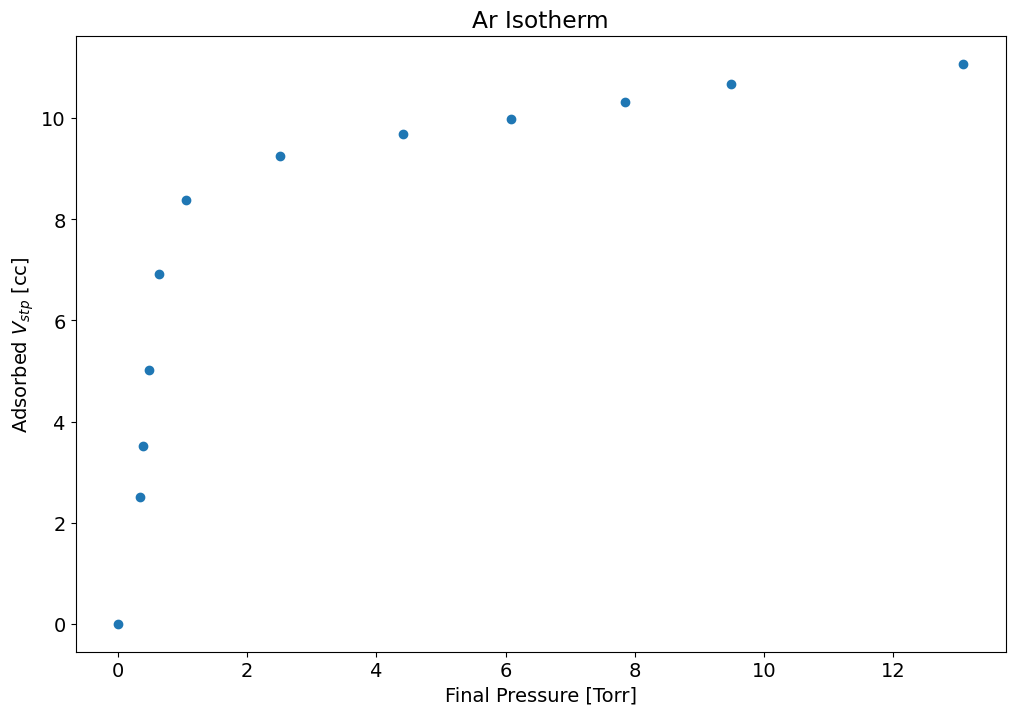

,Pf,Vstp
0,0.00,0.000000
1,0.34,2.499346
2,0.39,3.511862
3,0.48,5.030001
4,0.64,6.923843
5,1.06,8.374033
6,2.51,9.255570
7,4.41,9.695768
8,6.08,9.991142
9,7.84,10.317972


In [10]:
# Save Results

def simple_plot(csv_filepath):
    lab_data = pd.read_csv(csv_filepath)
    curr_Pf_array = lab_data['Pf'].to_numpy()
    curr_Vstp_array = lab_data['Vstp'].to_numpy()
    plt.plot(curr_Pf_array, curr_Vstp_array, 'o')
    plt.xlabel('Final Pressure [Torr]')
    plt.ylabel(r'Adsorbed $V_{stp}$ [cc]')
    if 'Ar' in csv_filepath:
        plt.title('Ar Isotherm')
    else:
        plt.title(r'$N_{2}$ Isotherm')

    plt.show()

simple_plot('Ar_isotherm.csv')

Ar_data = pd.read_csv('Ar_isotherm.csv')
Ar_data
    

## Repeat for nitrogen

In [21]:
# Reads in the data and prints the datafame
n2_data = pd.read_csv("N2_isotherm.csv")
n2_data

,Pf,Vstp
0,0.00,0.000000
1,0.33,2.502882
2,0.47,3.803107
3,0.59,4.806429
4,0.76,5.799331
5,0.90,6.295523
6,1.03,6.590871
7,1.33,6.973417
8,2.56,7.608034
9,3.38,7.813937


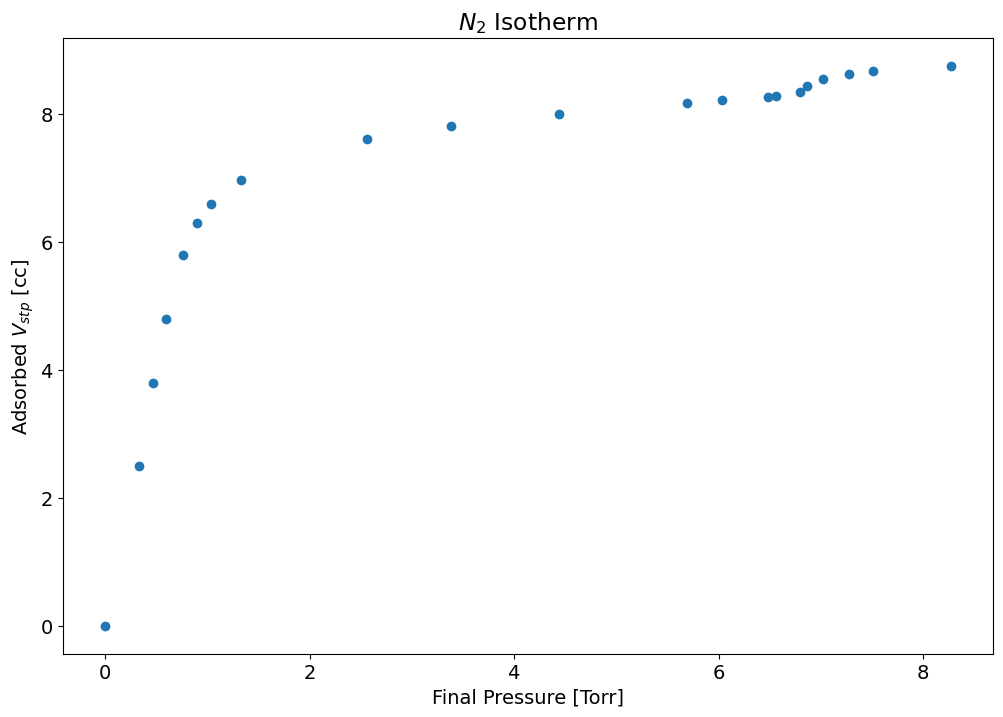

In [27]:
# Plot
simple_plot("N2_isotherm.csv")

## Use 'Point B' method to find monolayer coverage

The 'point B' method is a standardized way to estimate the monolayer coverage.  One fits the data points along the top of the step that are mostly linear in pressure.  The point at which this line intersects the knee of the curve is considered point "B". (Point "A" would be where the line intersects the y axis).

Use LMfit.  An example is sketched below.

Then fit the line to a slice of the data that is the linear portion.  Plot the line on the isotherm, and estimate the line's intersection with the knee by eye.  

Use the line parameters to calculate the coverage at the knee.

In [12]:
# Set up the Model

# Import the Linear model.
from lmfit.models import LinearModel
line = LinearModel()


In [13]:
# Argon first
# Select a "slice" of the data set from the results

indices = list(range(6,12))
x_data = Ar_data['Pf'][indices]
y_data = Ar_data['Vstp'][indices]

# Get starting parameters
Ar_params = line.guess(y_data, x=x_data)

# Feed these into the fitter and run it.
Ar_fit = line.fit(y_data, Ar_params, x=x_data)

# Print the results
Ar_fit

In [19]:
# Make a plot with the line included
# To include the line evaluated across the whole data set, use the eval() method.
# 
plt.plot(Ar_data['Pf'],Ar_fit.eval(x=Ar_data['Pf']),'-',label='Point B line')
# Add in he rest of the plot commands here, including the data.
plt.scatter(Ar_data['Pf'], Ar_data['Vstp'], label = 'Ar Isotherm')

pB = 3.0
unky = 0.3

plt.axvline(pB, color = 'r', linestyle = '--',
            label = f'Point B P = {pB}' + r'$\pm$' + str(unky) + ' Torr')
plt.axvline(pB + unky, color = 'black', linestyle = '--')
plt.axvline(pB - unky, color = 'black', linestyle = '--')

plt.title('Ar Point B Determination')
plt.xlabel('Equilibrium Pressure (Torr)')
plt.ylabel(r'Adsorbed $V_{stp}$ (cc)')
plt.ylim(0,12)
plt.legend()


### Evaluate the coverage at point 'B'

By eye from the plot, locate where the knee of the data, approximately, intersects the line (or begins to deviat away from it significantly).

Use the `eval()` method to obtain the coverage.

Then estimate an uncertainty for point B, and use eval to estimate an uncertainty in the coverage.  Assemble the result into an uncertainty object.


In [18]:
# Uncertainty Calculation of Coverage
coverage_nom = Ar_fit.eval(x = pB)
coverage_unc = Ar_fit.eval(x = pB + unky) - coverage_nom

coverage_B = unc.ufloat(coverage_nom, coverage_unc)
print(f"Coverage at Point B: {coverage_B:.3f}")

Coverage at Point B: 9.432+/-0.052


### Repeat for the nitrogen isotherm

In [22]:
# Select a "slice" of the data set from the results
indices = list(range(9, 15))
x_data2 = n2_data['Pf'][indices]
y_data2 = n2_data['Vstp'][indices]

# Gets starting parameters
n2_params = line.guess(y_data2, x = x_data2)

# Feed these into the fitter and run it.
n2_fit = line.fit(y_data2, n2_params, x = x_data2)

# Print the results
n2_fit

In [23]:
# Plot with the line included
# To include the line evaluated across the whole data set, use the eval() method.
# 
plt.plot(n2_data['Pf'],n2_fit.eval(x=n2_data['Pf']),'-',label='Point B line')
# Add in he rest of the plot commands here, including the data.
plt.scatter(n2_data['Pf'], n2_data['Vstp'], label = 'N2 Isotherm')

pB2 = 2.9
unky2 = 0.2

plt.axvline(pB2, color = 'r', linestyle = '--', 
            label = f'Point B P = {pB2}' + r'$\pm$' + str(unky2) + ' Torr')
plt.axvline(pB2 + unky2, color = 'black', linestyle = '--')
plt.axvline(pB2 - unky2, color = 'black', linestyle = '--')

plt.title('N2 Point B Determination')
plt.xlabel('Equilibrium Pressure (Torr)')
plt.ylabel(r'Adsorbed $V_{stp}$ (cc)')
plt.legend()

In [53]:
# Evaluate the coverage at point B and its uncertainty
n2_coverage_nom = Ar_fit.eval(x = pB2)
n2_coverage_unc = Ar_fit.eval(x = pB2 + unky2) - n2_coverage_nom

n2_coverage_B = unc.ufloat(n2_coverage_nom, n2_coverage_unc)
print(f"N2 Coverage at Point B: {n2_coverage_B:.2u}")

N2 Coverage at Point B: 9.414+/-0.035


## Other Calculations
* Extract the coverage at the top of the nitrogen isotherm substep and calculate the surface area of the graphite.
* Use the area to calculate the unit cell size of the argon monolayer.
* Look up the bulk unit cell of solid argon (fcc structure) and determine the atomic spacing.
* Evaluate the energy minimum of the Lennard-Jones potential, and estimate the equlibrium spacing from the constants given.
* Make a small table to compare the three different spacing of Ar atoms in different cases: in 3D bulk, in the adsorbed monolayer, and in a simple pair from the L-J potential.

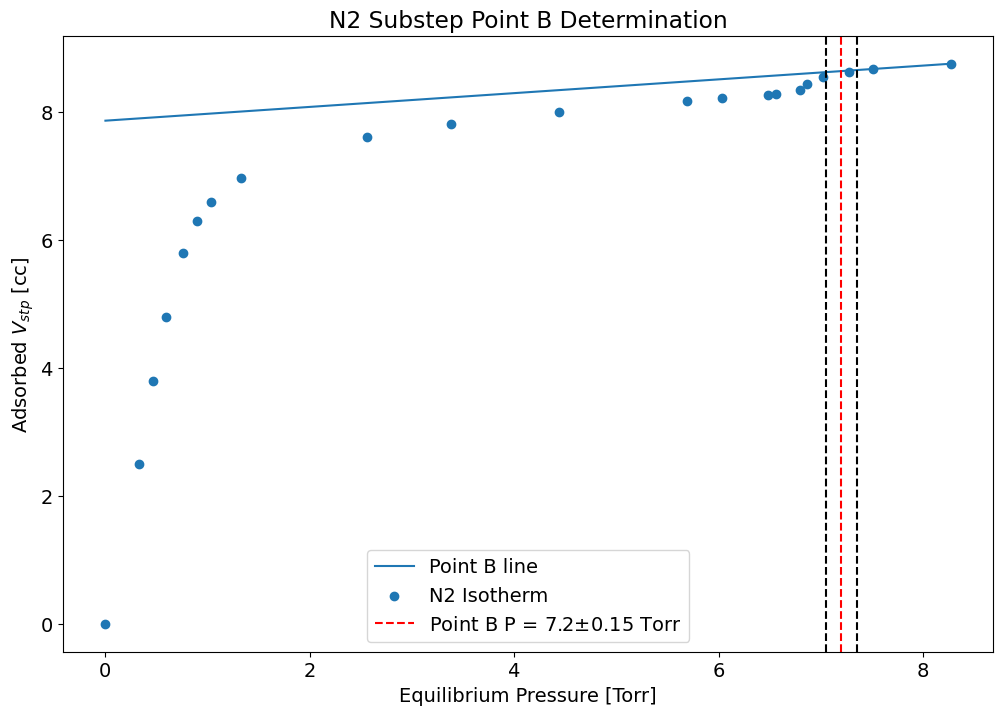

In [54]:
#N2 Substep Point B

indices = list(range(19,21))
x_data3 = n2_data['Pf'][indices]
y_data3 = n2_data['Vstp'][indices]

n2_params2 = line.guess(y_data3, x_data3)

n2_fit2 = line.fit(y_data3, n2_params2, x=x_data3)

# Print the results
n2_fit2

plt.plot(n2_data['Pf'],n2_fit2.eval(x=n2_data['Pf']),'-',label='Point B line')
plt.scatter(n2_data['Pf'],n2_data['Vstp'],label='N2 Isotherm')

pB3 = 7.2
unky3 = 0.15
plt.axvline(pB3, color='r', linestyle='--', 
            label=f'Point B P = {pB3}' + r'$\pm$' + str(unky3) + ' Torr')
plt.axvline(pB3 + unky3, color='black', linestyle='--')
plt.axvline(pB3 - unky3, color='black', linestyle='--')

plt.title('N2 Substep Point B Determination')
plt.xlabel('Equilibrium Pressure [Torr]')
plt.ylabel(r'Adsorbed $V_{stp}$ [cc]')
plt.legend()


In [57]:
#Covererage at Point B

n2_coverage_nom2 = n2_fit2.eval(x = pB3)
n2_coverage_unc2 = n2_fit2.eval(x = pB3+unky3) - n2_coverage_nom2

n2_pressure2_B = unc.ufloat(pB3, unky3)
n2_coverage2_B = unc.ufloat(n2_coverage_nom2, n2_coverage_unc2)

#Print results
print(f"Pressure at completion: {pB3:.2f}+/-{unky3:.2f} Torr")
print(f"n2 Coverage at Point B: {n2_coverage2_B:.2u} cc")
print(f"n2 pressure at Point B: {n2_pressure2_B:.2u} cc")

Pressure at completion: 7.20+/-0.15 Torr
n2 Coverage at Point B: 8.646+/-0.016 cc
n2 pressure at Point B: 7.20+/-0.15 cc


In [60]:
#Surface area of the graphite in meters

hex_a = 5.24E-20
n_ads = 101325 * n2_coverage2_B * (1E-6 / (273 * 1.381E-23))
SA_total = 1.04 * 3 * hex_a * n_ads

print(f"Total Surface Area: {SA_total:.2u} m^2")


Total Surface Area: 37.989+/-0.071 m^2


In [61]:
#Argon monolayer

#molecules/m^2
n2_density = 1/15.7E-20
#molecules/angstrom^2
n2_ang_dense = 1/15.7

Ar_density = (coverage_B/n2_coverage2_B) * n2_density
Ar_density_ang = (coverage_B/n2_coverage2_B) * n2_ang_dense

print(f"Ar density: {Ar_density:.2u} molecules/m^2")
print(f"Ar density: {Ar_density*1E-20:.2u} molecules/angstrom^2")
print(f"Ar density: {Ar_density_ang:.2u} molecules/angstrom^2")

Ar density: (6.949+/-0.041)e+18 molecules/m^2
Ar density: 0.06949+/-0.00041 molecules/angstrom^2
Ar density: 0.06949+/-0.00041 molecules/angstrom^2


In [62]:
#Fcc Argon
#Lattice constant in angstroms
lat_const = 5.26
r = (np.sqrt(2) * lat_const) / 2
print(f"Ar-Ar spacing: {r:.2f} angstroms")

Ar-Ar spacing: 3.72 angstroms
